# Sentiment Analysis on Amazon Reviews

## Problem Statement
Many online shoppers leave reviews for products on Amazon. These reviews contain valuable feedback in the form of text. The goal of this project is to analyze the sentiment of Amazon product reviews and classify them as positive or negative.

## Objectives
1. Load and explore Amazon Reviews dataset (train & test).  
2. Clean and preprocess the review text.  
3. Visualize patterns and distributions in the dataset.  
4. Build machine learning models to classify sentiment.  
5. Evaluate models using accuracy, F1-score, precision, and recall.  
6. Deploy a Streamlit dashboard where users can input text and see predicted sentiment.  
7. Interpret results after each step and discuss insights.


# Step 1: Import Basic Libraries

In [ ]:
# Basic data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string

# For displaying options
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 100)

print("✅ Basic libraries imported successfully!")


✅ Basic libraries imported successfully!


# Step 2: Load Train and Test Data

In [ ]:
import pandas as pd

# load dataset
train_df = pd.read_csv(
    "/content/test.csv",
    engine='python',
    on_bad_lines='skip',
    encoding='utf-8',
    encoding_errors='ignore'
)

test_df = pd.read_csv(
    "/content/train.csv",
    engine='python',
    on_bad_lines='skip',
    encoding='utf-8',
    encoding_errors='ignore'
)

print("----- Train Dataset -----")
display(train_df.head())

print("---------------------------------------------------------")

# Display first 5 rows of test
print("----- Test Dataset -----")
display(test_df.head())

----- Train Dataset -----


,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those..."
1,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying p..."
2,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."
3,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owner..."
4,1,DVD Player crapped out after one year,"I also began having the incorrect disc problems that I've read about on here. The VCR still works, but hte DVD side is useless. I understand that DVD players sometimes just quit on you, but after not even one year? To me that's a sign on bad quality. I'm giving up JVC after this as well. I'm sti..."


---------------------------------------------------------
----- Test Dataset -----


,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fa...
1,2,Amazing!,"This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen y..."
2,2,Excellent Soundtrack,"I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and D..."
3,2,"Remember, Pull Your Jaw Off The Floor After Hearing it","If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varie..."
4,2,an absolute masterpiece,"I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs an..."


In [ ]:
# Check your dataframe sizes
print(f"train_df has {len(train_df):,} rows")
print(f"test_df has {len(test_df):,} rows")

train_df has 155,501 rows
test_df has 147,120 rows


In [ ]:
# Check the shape (rows, columns)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check column names
print("Train columns:", list(train_df.columns))
print("Test columns:", list(test_df.columns))

Train shape: (155501, 3)
Test shape: (147120, 3)
Train columns: ['2', 'Great CD', 'My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"']
Test columns: ['2', 'Stuning even for the non-gamer', 'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155501 entries, 0 to 155500
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                     

**Dataset Structure**

Number of entries: 399,999 → almost 400k reviews.

Number of columns: 3 (but the names seem messy; likely the CSV didn’t have proper headers).
**Issue: Column names are not proper (first row might have been read as data).**

In [ ]:
# Fix column names
train_df.columns = ['score', 'summary', 'text']
test_df.columns = ['score', 'summary', 'text']

# Check first 5 rows after renaming
display(train_df.head())

# Check missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())


,score,summary,text
0,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those..."
1,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying p..."
2,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."
3,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owner..."
4,1,DVD Player crapped out after one year,"I also began having the incorrect disc problems that I've read about on here. The VCR still works, but hte DVD side is useless. I understand that DVD players sometimes just quit on you, but after not even one year? To me that's a sign on bad quality. I'm giving up JVC after this as well. I'm sti..."



Missing values per column:
score       0
summary    12
text        0
dtype: int64


In [ ]:
test_df.sample(5)

,score,summary,text
20043,2,Old-time Knee-slapping at it's finest!,"When this movie was first released, my dad, aunts & uncles, grandparents and anyone else of the ""older"" family generational ties would sit down countless times and watch this, and would end up laughing so hard at times you would almost swear they farted in their pants! Seriously, it's from a day..."
107120,2,Shakespearean?,"Overall the movie was a good movie. But if your'e going to steel Shakespear's play, then you must make the movie exactly the same. Otherwise the movie looses it's intrigue. The characters acted out their parts efficiently, but not extrordinarily. This was certainly not the best movie I have ever..."
58929,2,The Great Hunt...........Unbelevable!!!!!!!,"This is one of the best books I have ever read, and I look forward to reading its sequel!!!!!! (only took my 2 1/2 weeks to read!)"
34341,2,"Expensive, but necessary","These little weights are made of high quality stainless steel. They are a bit expensive, but are well worth it if you've ever gone diving/snorkeling and have something extremely buoyant tied to you. This set comes with all you need to achieve neutral buoyancy for your underwater Canon camera case."
112732,1,By The Numbers,"After reading the reviews here on Amazon, I'm wondering if we all saw the same movie. But there is only one WRONG TURN and, man, did I take it.Eliza Dushku is a knock-out but, if you stare at the photo of her on the DVD box, you've pretty much seen everything she's going to do in this movie. Tha..."


# Step 3: Map Score to Sentiment

In [ ]:
# Map polarity to sentiment
train_df['sentiment'] = train_df['score'].map({1:'negative', 2:'positive'})
test_df['sentiment'] = test_df['score'].map({1:'negative', 2:'positive'})

# Check distribution
print("Train sentiment distribution:\n", train_df['sentiment'].value_counts())
print("\nTest sentiment distribution:\n", test_df['sentiment'].value_counts())


Train sentiment distribution:
 sentiment
positive    78409
negative    77092
Name: count, dtype: int64

Test sentiment distribution:
 sentiment
positive    74628
negative    72492
Name: count, dtype: int64


# Step 4: Clean & Preprocess Text

In [ ]:
# Function to clean text
def clean_text(text):
    text = str(text)  # ensure string
    text = text.lower()  # lowercase
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'\r', '', text)  # remove carriage returns
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

# Apply to train and test
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Display sample before & after cleaning
print("Original review:\n", train_df['text'].iloc[0])
print("\nCleaned review:\n", train_df['clean_text'].iloc[0])


Original review:
 Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.

Cleaned review:
 despite the fact that i have only played a small portion of the game the music i heard plus the connection to chrono trigger which was great as well led me to purchase the soundtrack and it remains one of my favorite albu

## 4.1 Remove stopwords


In [ ]:
# Import stopwords from NLTK
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply to train and test cleaned text
train_df['clean_text'] = train_df['clean_text'].apply(remove_stopwords)
test_df['clean_text'] = test_df['clean_text'].apply(remove_stopwords)

# Display sample before & after
print("Original clean_text:\n", train_df['clean_text'].iloc[0])
print("\nAfter removing stopwords:\n", train_df['clean_text'].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Original clean_text:
 despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains one favorite albums incredible mix fun epic emotional songs sad beautiful tracks especially like theres many kinds songs video game soundtracks must admit one songs lifea distant promise brought tears eyes many occasionsmy one complaint soundtrack use guitar fretting effects many songs find distracting even werent included would still consider collection worth

After removing stopwords:
 despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains one favorite albums incredible mix fun epic emotional songs sad beautiful tracks especially like theres many kinds songs video game soundtracks must admit one songs lifea distant promise brought tears eyes many occasionsmy one complaint soundtrack use guitar fretting effects many songs find distracting even werent included would still 

# Step 5: EDA on Cleaned Text

## 5.1 Class Distribution

/tmp/ipython-input-2632664995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


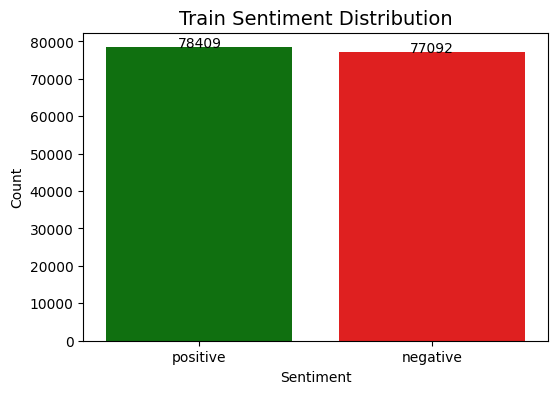

In [ ]:
# Sentiment counts
sentiment_counts = train_df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Define custom colors
color_map = {
    'positive': 'green',
    'negative': 'red'
}

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_counts,
    x='sentiment',
    y='count',
    palette=color_map
)

# Add text labels
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['count'] + 100, row['count'], ha='center', fontsize=10)

# Add title and labels
plt.title("Train Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show the plot
plt.show()


**Dataset is balanced, so no class weighting or oversampling is needed.**

In [ ]:
print("Sample negative review:\n")
display(train_df[train_df['sentiment']=='negative'].sample(1)['clean_text'].values[0])

print("\nSample positive review:\n")
display(train_df[train_df['sentiment']=='positive'].sample(1)['clean_text'].values[0])


Sample negative review:



'really wish didnt order items friends states get good price cant return wait long double shipping return time expires actually get item'


Sample positive review:



'awesome movieordered amazon wouldnt find store great watch friends'


**Observation:**

**Reviews are lowercase, punctuation removed, no URLs/newlines.**

**Text ready for tokenization.**

## 5.2 Review Length Analysis

In [ ]:
# Create a new column with the number of words in each review
train_df['review_len'] = train_df['clean_text'].apply(lambda x: len(str(x).split()))

# Now you can safely clip the length
review_len_clipped = train_df['review_len'].clip(upper=200)


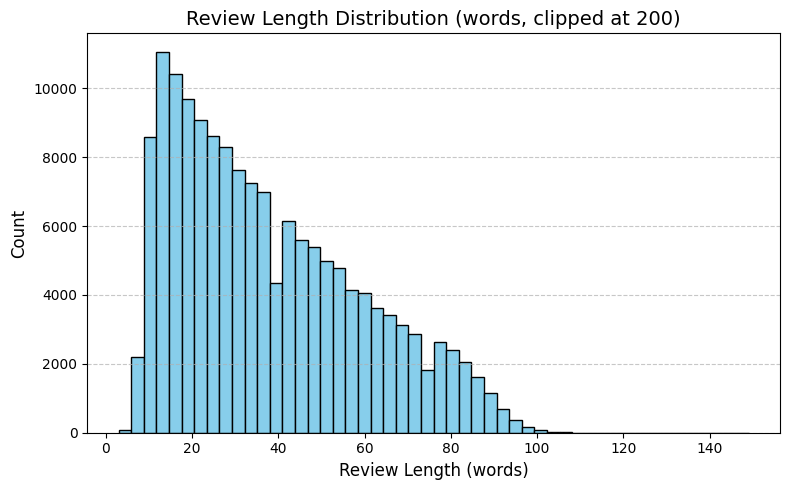

In [ ]:
# Clip review length at 200 words
review_len_clipped = train_df['review_len'].clip(upper=200)

# Create histogram using matplotlib
plt.figure(figsize=(8, 5))
plt.hist(
    review_len_clipped,
    bins=50,
    color='skyblue',           # fill color
    edgecolor='black',         # border color
    linewidth=1
)

# Add titles and labels
plt.title("Review Length Distribution (words, clipped at 200)", fontsize=14)
plt.xlabel("Review Length (words)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Most reviews are moderate length.**

## 5.3 Most Frequent Words

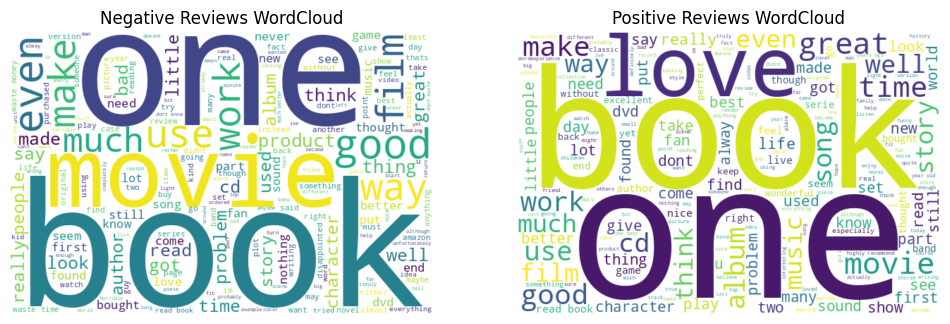

Top 10 negative words: [('book', 37845), ('one', 27931), ('like', 23399), ('would', 21044), ('movie', 17677), ('good', 16397), ('dont', 15561), ('get', 15499), ('time', 14033), ('even', 13351)]
Top 10 positive words: [('book', 39097), ('one', 27405), ('great', 25694), ('like', 20645), ('good', 20044), ('read', 16321), ('movie', 14512), ('love', 13670), ('would', 13595), ('well', 12723)]


In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Combine cleaned text per class
neg_text = " ".join(train_df[train_df['sentiment']=='negative']['clean_text'])
pos_text = " ".join(train_df[train_df['sentiment']=='positive']['clean_text'])

# Wordclouds
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")

plt.subplot(1,2,2)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

# Most common words
neg_counter = Counter(neg_text.split())
pos_counter = Counter(pos_text.split())
print("Top 10 negative words:", neg_counter.most_common(10))
print("Top 10 positive words:", pos_counter.most_common(10))


/tmp/ipython-input-3444857474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3444857474.py:15: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipython-input-3444857474.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3444857474.py:26: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


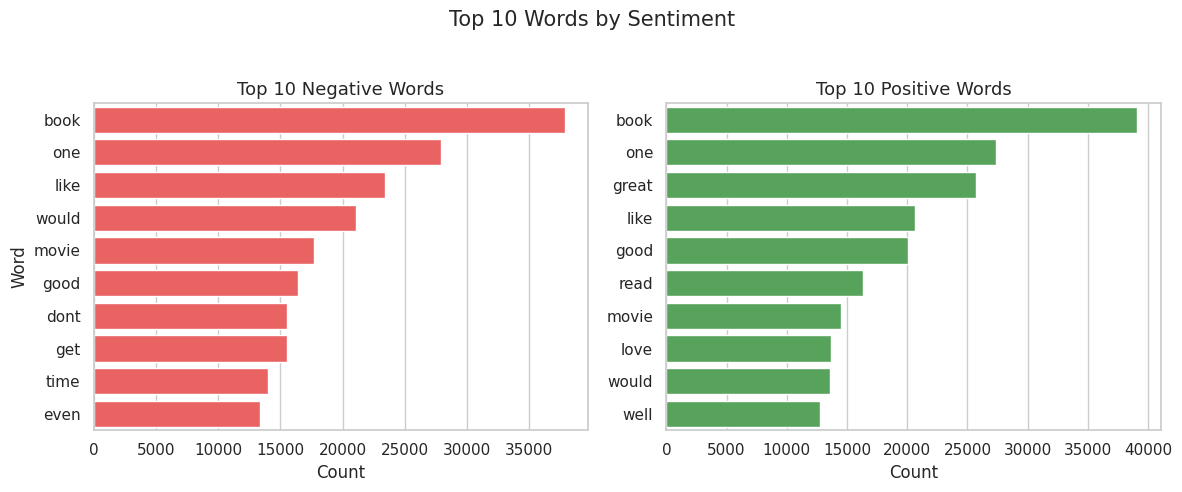

In [ ]:
# Count top 10 words for each sentiment
neg_counter = Counter(neg_text.split())
pos_counter = Counter(pos_text.split())

neg_top10 = pd.DataFrame(neg_counter.most_common(10), columns=['word', 'count'])
pos_top10 = pd.DataFrame(pos_counter.most_common(10), columns=['word', 'count'])

# Set style
sns.set(style="whitegrid")

# Create subplot: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Negative Words ---
sns.barplot(
    x='count', y='word',
    data=neg_top10,
    palette=['#ff4d4d'],
    ax=axes[0]
)
axes[0].set_title("Top 10 Negative Words", fontsize=13)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Word")

# --- Positive Words ---
sns.barplot(
    x='count', y='word',
    data=pos_top10,
    palette=['#4CAF50'],
    ax=axes[1]
)
axes[1].set_title("Top 10 Positive Words", fontsize=13)
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

# Adjust layout
plt.suptitle("Top 10 Words by Sentiment", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation (Before Custom Stopwords)**

Words like *one, would, get, like, book* are still very frequent in both positive and negative reviews.

Meaningful sentiment words *(good, great, love, dont)* are present but not the most dominant.

Neutral/frequent words may dilute the signal for sentiment classification.

To make the features more informative, we should remove these frequent neutral words using a custom stopwords list.

In [ ]:
# Define custom stopwords
custom_stopwords = ['one', 'would', 'get', 'like', 'also', 'us', 'book', 'time', 'even', 'movie', 'good', 'read']  # can extend later
stop_words_extended = stop_words.union(custom_stopwords)

# Function to remove extended stopwords
def remove_custom_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words_extended])

# Apply to train dataset
train_df['clean_text_final'] = train_df['clean_text'].apply(remove_custom_stopwords)
test_df['clean_text_final'] = test_df['clean_text'].apply(remove_custom_stopwords)

# Combine cleaned text per class
neg_text_final = " ".join(train_df[train_df['sentiment']=='negative']['clean_text_final'])
pos_text_final = " ".join(train_df[train_df['sentiment']=='positive']['clean_text_final'])

# Count words
neg_counter_final = Counter(neg_text_final.split())
pos_counter_final = Counter(pos_text_final.split())

# Display top 10 words after custom stopwords removal
print("Top 10 negative words (custom stopwords removed):", neg_counter_final.most_common(10))
print("Top 10 positive words (custom stopwords removed):", pos_counter_final.most_common(10))


Top 10 negative words (custom stopwords removed): [('dont', 15561), ('really', 11883), ('much', 11386), ('first', 10861), ('buy', 9728), ('could', 9399), ('money', 9391), ('better', 9382), ('product', 8888), ('great', 8658)]
Top 10 positive words (custom stopwords removed): [('great', 25694), ('love', 13670), ('well', 12723), ('really', 12328), ('album', 11063), ('best', 10909), ('first', 10501), ('cd', 10352), ('much', 9362), ('story', 8742)]


## Advanced EDA Tasks

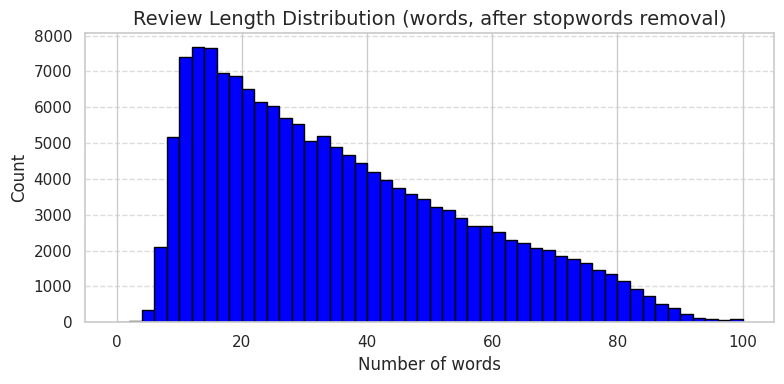

In [ ]:
# Compute review length if not already
train_df['review_len_final'] = train_df['clean_text_final'].apply(lambda x: len(x.split()))

# Clip review length at 100 words
review_len_clipped = train_df['review_len_final'].clip(upper=100)

# --- Matplotlib Histogram ---
plt.figure(figsize=(8, 4))
plt.hist(
    review_len_clipped,
    bins=50,
    color='blue',          # same color as plotly version
    edgecolor='black',     # border for clarity
    linewidth=1
)

# Add title and labels
plt.title("Review Length Distribution (words, after stopwords removal)", fontsize=14)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reviews are slightly shorter after removing stopwords.**

# Step 6: Feature Engineering & Vectorization

## 6.1 TF/ IDF

In [ ]:
test_df.head()

,score,summary,text,sentiment,clean_text,clean_text_final
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fa...,positive,im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny,im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money feel worth every penny
1,2,Amazing!,"This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen y...",positive,soundtrack favorite music time hands intense sadness prisoners fate means youve played game hope distant promise girl stole star important inspiration personally throughout teen years higher energy tracks like chrono cross times scar time dreamwatch chronomantique indefinably remeniscent chrono ...,soundtrack favorite music hands intense sadness prisoners fate means youve played game hope distant promise girl stole star important inspiration personally throughout teen years higher energy tracks chrono cross times scar dreamwatch chronomantique indefinably remeniscent chrono trigger absolut...
2,2,Excellent Soundtrack,"I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and D...",positive,truly like soundtrack enjoy video game music played game music enjoy truly relaxing peacefulon disk one favorites scars time life death forest illusion fortress ancient dragons lost fragment drowned valleydisk two draggons galdorb home chronomantique prisoners fate gale girlfriend likes zelbessd...,truly soundtrack enjoy video game music played game music enjoy truly relaxing peacefulon disk favorites scars life death forest illusion fortress ancient dragons lost fragment drowned valleydisk two draggons galdorb home chronomantique prisoners fate gale girlfriend likes zelbessdisk three best...
3,2,"Remember, Pull Your Jaw Off The Floor After Hearing it","If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varie...",positive,youve played game know divine music every single song tells story game good greatest songs without doubt chrono cross times scar magical dreamers wind stars sea radical dreamers unstolen jewel translation varies music perfect ask best yasunori mitsuda poured heart wrote paper,youve played game know divine music every single song tells story game greatest songs without doubt chrono cross times scar magical dreamers wind stars sea radical dreamers unstolen jewel translation varies music perfect ask best yasunori mitsuda poured heart wrote paper
4,2,an absolute masterpiece,"I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's mu

In [ ]:
# Check your dataframe sizes
print(f"train_df has {len(train_df):,} rows")
print(f"test_df has {len(test_df):,} rows")

train_df has 155,501 rows
test_df has 147,120 rows


In [ ]:
# Take first 100k rows for training and testing
train_subset = train_df.sample(n=100000, random_state=42)
test_subset = test_df.sample(n=100000, random_state=42)

# TF-IDF on subset
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20000)
X_train_sub = tfidf.fit_transform(train_subset['clean_text_final'])
X_test_sub = tfidf.transform(test_subset['clean_text_final'])

# Labels
y_train_sub = train_subset['sentiment'].map({'negative':0, 'positive':1}).values
y_test_sub = test_subset['sentiment'].map({'negative':0, 'positive':1}).values

# Check shapes
print("X_train_sub shape:", X_train_sub.shape)
print("X_test_sub shape:", X_test_sub.shape)


X_train_sub shape: (100000, 20000)
X_test_sub shape: (100000, 20000)


**Observation: Why We Use Subset**

Full dataset is huge (~4 million reviews × 20,000 features).

Training on full data takes very long time and **uses high memory**.

Subset of 100,000 reviews allows quick testing.

Helps to compare models efficiently before scaling to full dataset.

# Step 7: Baseline Models

## Train Multiple ML Models

In [ ]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----------------------------
# Function to train, predict and record metrics
# ----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Train Time (s)": train_time,
        "Prediction Time (s)": pred_time
    }
    return y_pred, metrics

# ----------------------------
# Models to evaluate
# ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# ----------------------------
# Train, predict, and evaluate all models on subset
# ----------------------------
for name, model in models.items():
    print(f"Training {name} ...")
    y_pred, metrics = evaluate_model(model, X_train_sub, y_train_sub, X_test_sub, y_test_sub)
    results[name] = metrics

# ----------------------------
# Create DataFrame for comparison
# ----------------------------
results_df = pd.DataFrame(results).T  # transpose for readability
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nAll Model Metrics & Time Comparison on Subset:")
print(results_df)


Training Logistic Regression ...
Training Naive Bayes ...
Training SVM ...
Training Random Forest ...
Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:52:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



All Model Metrics & Time Comparison on Subset:
                     Accuracy  Precision    Recall  F1-Score  Train Time (s)  \
Logistic Regression   0.85971   0.855459  0.869515  0.862430        0.727491   
SVM                   0.85138   0.847850  0.860558  0.854157        3.169808   
Random Forest         0.82950   0.836245  0.824274  0.830216      391.216604   
Naive Bayes           0.82947   0.826172  0.839420  0.832743        0.058777   
XGBoost               0.81954   0.807700  0.844146  0.825521      101.843455   

                     Prediction Time (s)  
Logistic Regression             0.016118  
SVM                             0.009240  
Random Forest                   7.986203  
Naive Bayes                     0.015746  
XGBoost                         0.744762  


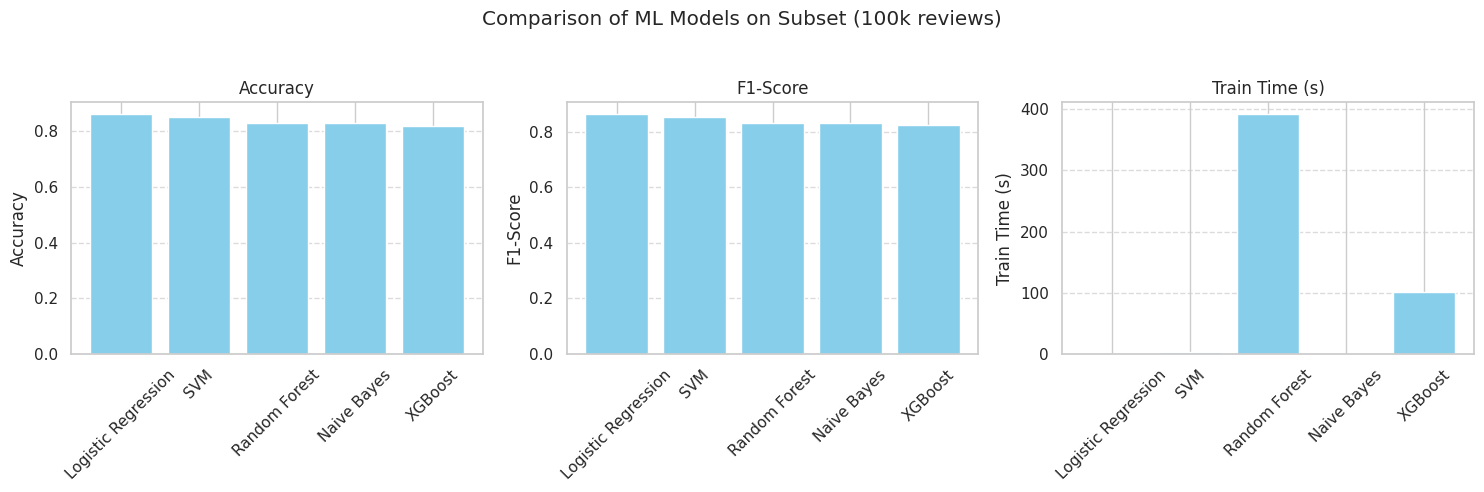

In [ ]:
# Metrics to plot
metrics_to_plot = ["Accuracy", "F1-Score", "Train Time (s)"]

# Set figure size
plt.figure(figsize=(15,5))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.bar(results_df.index, results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Comparison of ML Models on Subset (100k reviews)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# Re-train Logistic Regression on your subset data
best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train_sub, y_train_sub)

# Save model and TF-IDF vectorizer
import joblib
joblib.dump(best_model, "logistic_regression_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Model and TF-IDF vectorizer saved successfully!")

✅ Model and TF-IDF vectorizer saved successfully!


In [ ]:
# Display DataFrame
print("Model Performance Overview:")

# Create DataFrame for comparison
results_df = pd.DataFrame(results).T  # transpose for readability
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # sort by Accuracy

# Display nicely in notebook
results_df.style.background_gradient(cmap='Blues')


Model Performance Overview:


,Accuracy,Precision,Recall,F1-Score,Train Time (s),Prediction Time (s)
Logistic Regression,0.859710,0.855459,0.869515,0.862430,0.727491,0.016118
SVM,0.851380,0.847850,0.860558,0.854157,3.169808,0.009240
Random Forest,0.829500,0.836245,0.824274,0.830216,391.216604,7.986203
Naive Bayes,0.829470,0.826172,0.839420,0.832743,0.058777,0.015746
XGBoost,0.819540,0.807700,0.844146,0.825521,101.843455,0.744762


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ------------------------------------------------------
# Step 2: Load saved model and vectorizer
# ------------------------------------------------------
model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

print("✅ Model and vectorizer loaded successfully!\n")

✅ Model and vectorizer loaded successfully!



In [ ]:
data = {
    "review": [
        # Positive
        "I love this product, it works great!",
        "Amazing quality and super fast delivery.",
        "Highly recommend, I’m very satisfied.",
        "Best purchase ever! Worth every penny.",
        "Excellent service and friendly staff.",
        "I’m so happy with my order, thank you!",
        "The design is beautiful and feels premium.",
        "Five stars! Would definitely buy again.",
        "Great experience overall, no issues at all.",
        "Perfect size, color, and quality!",
        "Really good, it exceeded my expectations.",
        "Totally worth it, great value for money.",
        "Everything arrived on time, thank you!",
        "Love it so much, very comfortable to use.",
        "Fast delivery and great customer support.",
        "Exactly what I needed, works perfectly.",
        "Very nice product, looks amazing.",
        "Satisfied with my purchase, thank you!",
        "Super easy to use and setup.",
        "Absolutely fantastic experience!",
        # Negative
        "Terrible quality, broke after one use.",
        "Waste of money, very disappointed.",
        "Worst purchase I’ve made online.",
        "Item arrived damaged and dirty.",
        "Customer support was not helpful at all.",
        "Didn’t work as described, useless.",
        "The color was different from the pictures.",
        "Late delivery and poor packaging.",
        "I don’t recommend this to anyone.",
        "Not worth the price, too expensive.",
        "Bad quality and weird smell.",
        "Completely stopped working after two days.",
        "Cheap material, looks nothing like the image.",
        "Disappointed, expected much better.",
        "Wouldn’t buy again, not satisfied.",
        "Horrible experience, waste of time.",
        "Very slow delivery, bad service.",
        "Feels cheap and fragile.",
        "Item was missing parts.",
        "Worst experience ever!"
    ],
    "label": [
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0
    ]
}

df_unseen = pd.DataFrame(data)
df_unseen.sample(6)


,review,label
14,Fast delivery and great customer support.,1
16,"Very nice product, looks amazing.",1
31,Completely stopped working after two days.,0
19,Absolutely fantastic experience!,1
37,Feels cheap and fragile.,0
30,Bad quality and weird smell.,0


In [ ]:
X_unseen = vectorizer.transform(df_unseen['review'])
y_true = df_unseen['label']

# ------------------------------------------------------
# Step 5: Predict with the loaded model
# ------------------------------------------------------
y_pred = model.predict(X_unseen)

# ------------------------------------------------------
# Step 6: Evaluate model performance
# ------------------------------------------------------
print("📊 Model Performance on Unseen Dataset:")
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
print(f"Precision: {precision_score(y_true, y_pred):.2f}")
print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
print(f"F1-Score:  {f1_score(y_true, y_pred):.2f}\n")

print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

# ------------------------------------------------------
# Step 7: Optional — Show some predictions
# ------------------------------------------------------
print("\n🔍 Example Predictions:")
for i in range(5):
    print(f"Review: {df_unseen['review'][i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i] == 1 else 'Negative'} | Actual: {'Positive' if y_true[i] == 1 else 'Negative'}\n")

📊 Model Performance on Unseen Dataset:
Accuracy:  0.90
Precision: 0.83
Recall:    1.00
F1-Score:  0.91

📋 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.80      0.89        20
    Positive       0.83      1.00      0.91        20

    accuracy                           0.90        40
   macro avg       0.92      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40


🔍 Example Predictions:
Review: I love this product, it works great!
Predicted Sentiment: Positive | Actual: Positive

Review: Amazing quality and super fast delivery.
Predicted Sentiment: Positive | Actual: Positive

Review: Highly recommend, I’m very satisfied.
Predicted Sentiment: Positive | Actual: Positive

Review: Best purchase ever! Worth every penny.
Predicted Sentiment: Positive | Actual: Positive

Review: Excellent service and friendly staff.
Predicted Sentiment: Positive | Actual: Positive



# Step 8: Insight

### 2. Observations / Interpretation

- **Logistic Regression:** Best balance of accuracy and F1-score; fast training and prediction; ideal baseline for TF-IDF features.  
- **SVM (LinearSVC):** Close performance to Logistic Regression; slightly faster; good linear model alternative.  
- **Naive Bayes:** Fastest to train and predict; lower accuracy but good for quick prototypes.  
- **Random Forest & XGBoost:** Much slower to train; lower accuracy for high-dimensional TF-IDF data; better for smaller datasets or dense features.

### 3. Insights for Project

- TF-IDF works well for Amazon review sentiment classification.  
- Linear models (Logistic Regression, SVM) are most suitable for this task.  
- Logistic Regression is recommended for real-time prediction or dashboard deployment.  
